<a href="https://colab.research.google.com/github/Vitaliy39/MyML/blob/master/test_edf_SZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EEG schizophrenia

###Data

[EEG in schizophrenia](https://repod.icm.edu.pl/dataset.xhtml?persistentId=doi:10.18150/repod.0107441)

The dataset comprised 14 patients with paranoid schizophrenia and 14 healthy controls. Data were acquired with the sampling frequency of 250 Hz using the standard 10-20 EEG montage with 19 EEG channels: Fp1, Fp2, F7, F3, Fz, F4, F8, T3, C3, Cz, C4, T4, T5, P3, Pz, P4, T6, O1, O2. The reference electrode was placed between electrodes Fz and Cz.

###Article about data
[Graph-based analysis of brain connectivity in schizophrenia](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0188629)

####Participant recruitment
The study comprised of 14 patients (7 males: 27.9 ± 3.3 years, 7 females: 28.3 ± 4.1 years) with paranoid schizophrenia, who were hospitalized at the Institute of Psychiatry and Neurology in Warsaw, Poland, and 14 healthy controls (7 males: 26.8 ± 2.9, 7 females: 28.7 ± 3.4 years). The patients met International Classification of Diseases ICD–10 criteria for paranoid schizophrenia (category F20.0). Study protocol was approved by the Ethics Committee of the Institute of Psychiatry and Neurology in Warsaw. All participants received a written description of the protocol and provided written consent to take part in this study. Inclusion criteria were: a minimum age of 18, ICD-10 diagnosis F20.0, and medication washout period of a minimum of seven days. Exclusion criteria were: pregnancy, organic brain pathology, severe neurological diseases (e.g. epilepsy, Alzheimer’s, or Parkinson disease), presence of a general medical condition, and very early stage of schizophrenia, i.e., first episode of schizophrenia. The control group was matched in gender and age to the 14 patients completing the study.

####EEG recording and preprocessing
Fifteen minutes of EEG data were recorded in all subjects during an eyes-closed resting state condition. Data were acquired with the sampling frequency of 250 Hz using the standard 10–20 EEG montage with 19 EEG channels: Fp1, Fp2, F7, F3, Fz, F4, F8, T3, C3, Cz, C4, T4, T5, P3, Pz, P4, T6, O1, O2. The reference electrode was placed at FCz.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import glob
import sys
import os

%matplotlib inline 

import seaborn as sns

np.random.seed(33)

import random as python_random

python_random.seed(33)

import tensorflow as tf
tf.random.set_seed(33)

#from tensorflow import keras
#from tensorflow.keras import layers

print('tensorflow v.', tf.__version__)
print('keras v.', tf.keras.__version__)
print('channel format:', tf.keras.backend.image_data_format())

device_name = tf.test.gpu_device_name()
print(device_name)

tensorflow v. 2.3.0
keras v. 2.4.0
channel format: channels_last
/device:GPU:0


For get data from EDF - use MNE library

[mne.io.read_raw_edf](https://mne.tools/stable/generated/mne.io.read_raw_edf.html#mne.io.read_raw_edf)

In [ ]:
!pip install mne

import mne

In [ ]:
file = "./data/h01.edf"
data = mne.io.read_raw_edf(file)
print(type(data))
raw_data = data.get_data()
print(type(raw_data))
print(raw_data.shape)
# you can get the metadata included in the file and a list of all channels:
info = data.info
print(info)
channels = data.ch_names

eeg_channel_names = channels
print(eeg_channel_names)

Extracting EDF parameters from /content/data/h01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
<class 'mne.io.edf.edf.RawEDF'>
<class 'numpy.ndarray'>
(19, 231250)
<Info | 7 non-empty values
 bads: []
 ch_names: Fp2, F8, T4, T6, O2, Fp1, F7, T3, T5, O1, F4, C4, P4, F3, C3, ...
 chs: 19 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2003-06-23 16:14:37 UTC
 nchan: 19
 projs: []
 sfreq: 250.0 Hz
>
['Fp2', 'F8', 'T4', 'T6', 'O2', 'Fp1', 'F7', 'T3', 'T5', 'O1', 'F4', 'C4', 'P4', 'F3', 'C3', 'P3', 'Fz', 'Cz', 'Pz']


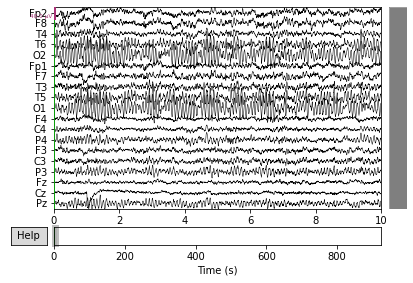

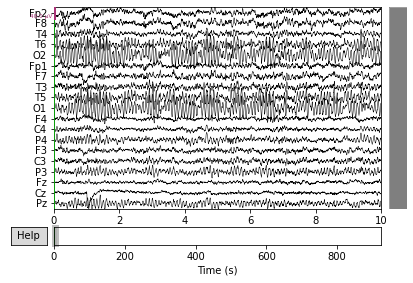

In [ ]:
data.plot()

In [ ]:
del file
del data
del raw_data

In [ ]:
# Get names of files
eeg_data_files_norm = sorted(glob.glob('./data/h*.edf'))
print(len(eeg_data_files_norm), eeg_data_files_norm)

eeg_data_files_sch = sorted(glob.glob('./data/s*.edf'))
print(len(eeg_data_files_sch), eeg_data_files_sch)

14 ['./data/h12.edf', './data/h11.edf', './data/h13.edf', './data/h10.edf', './data/h14.edf', './data/h07.edf', './data/h09.edf', './data/h02.edf', './data/h01.edf', './data/h06.edf', './data/h03.edf', './data/h05.edf', './data/h08.edf', './data/h04.edf']
14 ['./data/s04.edf', './data/s13.edf', './data/s10.edf', './data/s09.edf', './data/s14.edf', './data/s03.edf', './data/s08.edf', './data/s11.edf', './data/s05.edf', './data/s06.edf', './data/s12.edf', './data/s02.edf', './data/s01.edf', './data/s07.edf']


In [ ]:
fs = 250
channels_count = 19

channels_names = eeg_channel_names
print('eeg_channel_names:', eeg_channel_names)
print('channels_names:', channels_names)

eeg_channel_names: ['Fp2', 'F8', 'T4', 'T6', 'O2', 'Fp1', 'F7', 'T3', 'T5', 'O1', 'F4', 'C4', 'P4', 'F3', 'C3', 'P3', 'Fz', 'Cz', 'Pz']
channels_names: ['Fp2', 'F8', 'T4', 'T6', 'O2', 'Fp1', 'F7', 'T3', 'T5', 'O1', 'F4', 'C4', 'P4', 'F3', 'C3', 'P3', 'Fz', 'Cz', 'Pz']


In [ ]:
def read_eeg_data_from_edf_file(file_name, print_info=True):
    if print_info:
        verbose='INFO'
    else:
        verbose='WARNING'
    
    data = mne.io.read_raw_edf(file_name, verbose=verbose)
    raw_data = data.get_data()
    if print_info:
        print(raw_data.shape)
    # you can get the metadata included in the file and a list of all channels:
    info = data.info
    channels = data.ch_names
    if print_info:
        print(info)
        print(channels)

    # convert data to DataFrame
    df2 = pd.DataFrame(raw_data.transpose(), columns=channels)
    df2[:] = df2.astype('float32')
    if print_info:
        print(df2.shape)
        print(df2.info())
        print(df2.head())
        print(df2.tail())

    return df2

df = read_eeg_data_from_edf_file(eeg_data_files_norm[0])

Extracting EDF parameters from /content/data/h12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
(19, 225000)
<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T3, T4, T5, ...
 chs: 19 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2003-07-03 18:33:55 UTC
 nchan: 19
 projs: []
 sfreq: 250.0 Hz
>
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz']
(225000, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225000 entries, 0 to 224999
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Fp1     225000 non-null  float32
 1   Fp2     225000 non-null  float32
 2   F3      225000 non-null  float32
 3   F4      225000 non-null  float32
 4   C3      225000 non-null  float32
 5   C4      225000 non-null  float32
 6   P3      225000 non-null  float

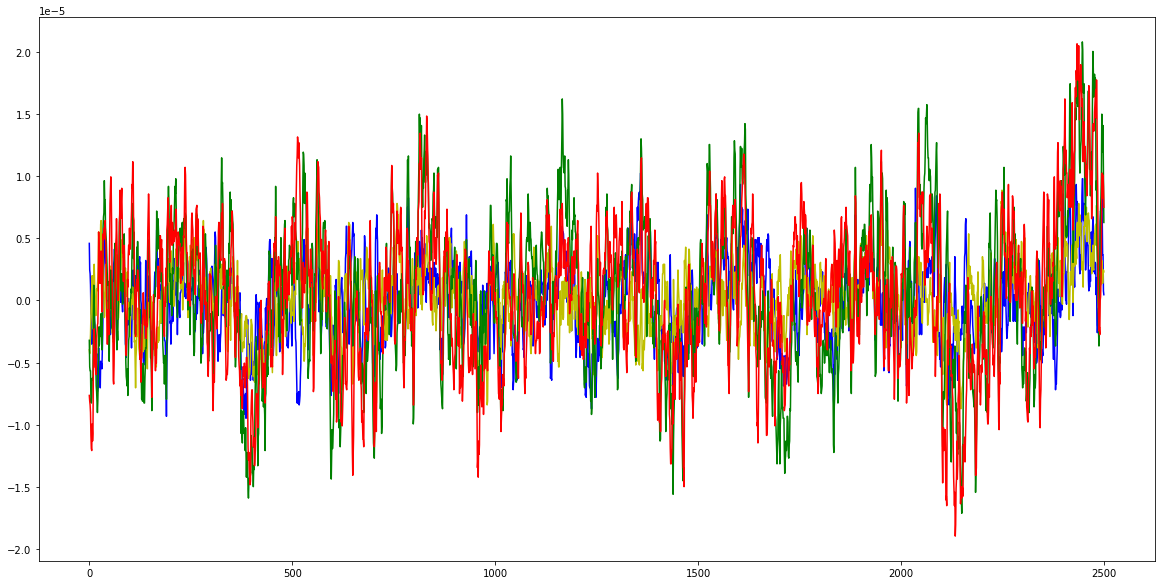

In [ ]:
plt.figure(figsize=(20,10))
channel = 'O2'
start = 0
end = int(fs*10)
plt.plot( df['P3'][start:end], 'b')
plt.plot( df['P4'][start:end], 'y')
#plt.plot( df['ch10'][start:end], 'c')
#plt.plot( df['ch4'][start:end], 'm')
#plt.plot( df['ch8'][start:end], 'k')
plt.plot( df['O1'][start:end], 'g')
plt.plot( df[channel][start:end], 'r')
plt.show()

In [ ]:
# filtration

import scipy
from scipy import signal

def notch_filter(x, fs, f0 = 50.0):
    w0 = f0/(fs/2.0)  # Normalized Frequency
    
    # Design notch filter
    b, a = signal.iirnotch(w0, 30.0)
    # Apply a digital filter
    res = signal.filtfilt(b, a, x)
    return res

def highpass_filter(x, fs, f0 = 1.0, order = 2):
    w0 = f0/(fs/2.0)  # Normalized Frequency

    b, a = signal.butter(order, w0, btype='high', analog=False)
    
    # Apply a digital filter
    res = signal.filtfilt(b, a, x)
    return res

def lowpass_filter(x, fs, f0 = 50.0, order = 2):
    w0 = f0/(fs/2.0)  # Normalized Frequency

    b, a = signal.butter(order, w0, btype='low', analog=False)
    
    # Apply a digital filter
    res = signal.filtfilt(b, a, x)
    return res

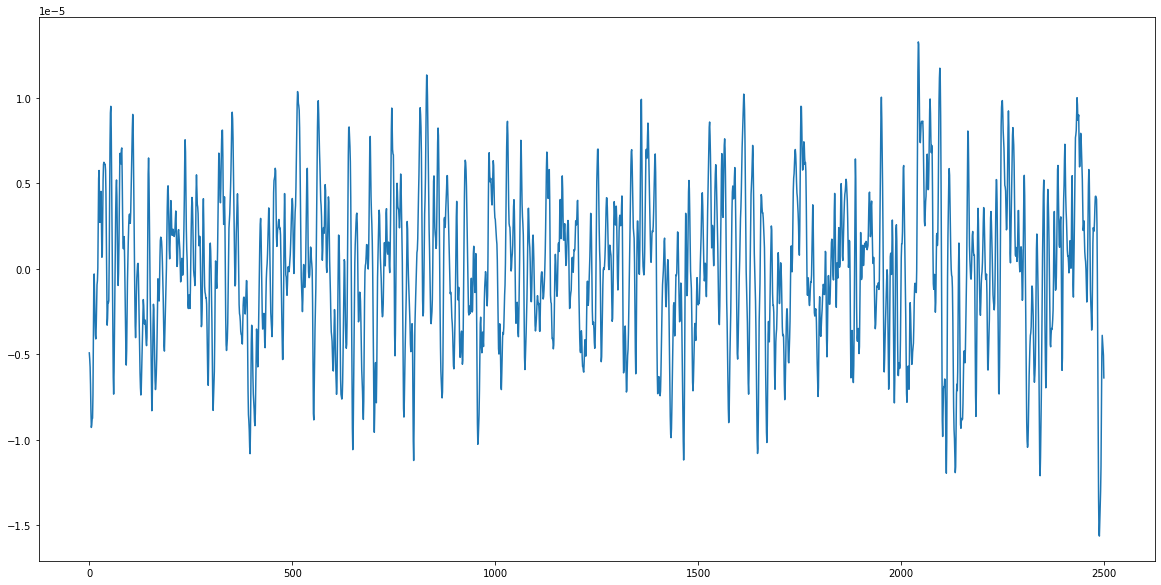

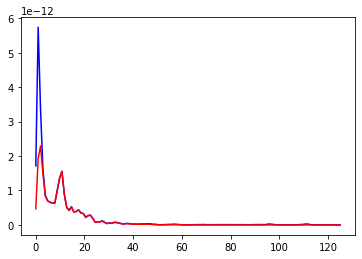

In [ ]:
plt.figure(figsize=(20,10))
#plt.plot( df[channel][start:end], 'r')
plt.plot( lowpass_filter( highpass_filter( notch_filter(df[channel][start:end], fs), fs ), fs, 60) )
plt.show()

s = df[channel][start:end]
x, y = signal.welch(s, fs)
sf = lowpass_filter( highpass_filter( notch_filter(df[channel][start:end], fs), fs ), fs, 60)
x2, y2 = signal.welch(sf, fs)
plt.plot( x, y, 'b', x2, y2, 'r')
plt.show()

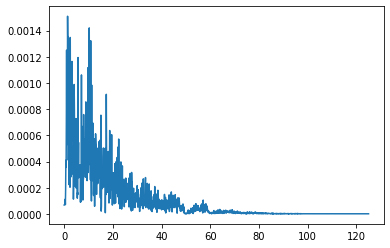

In [ ]:
# Get real amplitudes of FFT (only in postive frequencies)
fft_vals = np.abs(np.fft.rfft(sf))

# Get frequencies for amplitudes in Hz
fft_freq = np.fft.rfftfreq(len(sf), 1.0/fs)

plt.plot(fft_freq, fft_vals) 

In [ ]:
# define files for train and test 

from sklearn.model_selection import train_test_split

fnorm_train, fnorm_test = train_test_split(eeg_data_files_norm, test_size=0.2, random_state=42)
print(len(fnorm_train), len(fnorm_test))
print(fnorm_train)
print(fnorm_test)

fsch_train, fsch_test = train_test_split(eeg_data_files_sch, test_size=0.2, random_state=42)
print(len(fsch_train), len(fsch_test))
print(fsch_train)
print(fsch_test)


11 3
['./data/h08.edf', './data/h07.edf', './data/h01.edf', './data/h13.edf', './data/h11.edf', './data/h04.edf', './data/h14.edf', './data/h02.edf', './data/h03.edf', './data/h10.edf', './data/h09.edf']
['./data/h06.edf', './data/h05.edf', './data/h12.edf']
11 3
['./data/s01.edf', './data/s03.edf', './data/s05.edf', './data/s10.edf', './data/s13.edf', './data/s07.edf', './data/s14.edf', './data/s11.edf', './data/s12.edf', './data/s09.edf', './data/s08.edf']
['./data/s06.edf', './data/s02.edf', './data/s04.edf']


In [ ]:
# load train data

window_size = int(5*fs)
window_step = 250 #125

def get_eeg_data(df, eeg_channel_names, window_size, window_step):
    eeg_data = []

    for i in range(0, df.shape[0]-window_size, window_step):
        start = i
        end = start + window_size
        data = np.array(df[eeg_channel_names][start:end], dtype=np.float32)
        eeg_data.append(data)
    
    return np.asarray(eeg_data)

def prep_data(files_list):
    data = None
    for filename in files_list:
        print(filename)
        df = read_eeg_data_from_edf_file(filename, print_info=False)
        dt = get_eeg_data(df, eeg_channel_names, window_size, window_step)
        #print(dt.shape)
        if data is not None:
            data = np.vstack([data, dt])
        else:
            data = dt.copy()
    return data

x0_train = prep_data(fnorm_train)
print(x0_train.shape)

x0_test = prep_data(fnorm_test)
print(x0_test.shape)

x1_train = prep_data(fsch_train)
print(x1_train.shape)

x1_test = prep_data(fsch_test)
print(x1_test.shape)

./data/h08.edf
./data/h07.edf
./data/h01.edf
./data/h13.edf
./data/h11.edf
./data/h04.edf
./data/h14.edf
./data/h02.edf
./data/h03.edf
./data/h10.edf
./data/h09.edf
(10200, 1250, 19)
./data/h06.edf
./data/h05.edf
./data/h12.edf
(2760, 1250, 19)
./data/s01.edf
./data/s03.edf
./data/s05.edf
./data/s10.edf
./data/s13.edf
./data/s07.edf
./data/s14.edf
./data/s11.edf
./data/s12.edf
./data/s09.edf
./data/s08.edf
(12688, 1250, 19)
./data/s06.edf
./data/s02.edf
./data/s04.edf
(3075, 1250, 19)


In [ ]:
def standartization(data):
    res = (data - np.mean(data)) / np.std(data) 
    return res

print('mean:', np.mean(x0_train))
print('std:', np.std(x0_train))

# Standartization

x0_train = standartization(x0_train)
x0_test = standartization(x0_test)
x1_train = standartization(x1_train)
x1_test = standartization(x1_test)
print(x0_train.shape[0], x1_train.shape[0])

# Form train and test data

X_train = np.concatenate( (x0_train, x1_train) )
y_train = np.concatenate( (np.zeros(x0_train.shape[0]), np.ones(x1_train.shape[0])) )
print(X_train.shape, y_train.shape)
print('0:', y_train[y_train == 0].shape, '1:', y_train[y_train == 1.].shape)

X_test = np.concatenate( (x0_test, x1_test) )
y_test = np.concatenate( (np.zeros(x0_test.shape[0]), np.ones(x1_test.shape[0])) )
print(X_test.shape, y_test.shape)
print('0:', y_test[y_test == 0].shape, '1:', y_test[y_test == 1.].shape)

mean: 3.32793e-09
std: 1.1321801e-05
10200 12688
(22888, 1250, 19) (22888,)
0: (10200,) 1: (12688,)
(5835, 1250, 19) (5835,)
0: (2760,) 1: (3075,)


In [ ]:
# convert to channels, samples, 1 (in TF -> NHWC)
def convert_to_CS1(x):
    print('x.shape:', x.shape )
    print ('x[0].shape:', x[0].shape)
    print('moveaxis...')
    res = np.moveaxis(x, 1, 2) # change to new order: channels, samples
    print('res.shape:', res.shape )
    print ('res[0].shape:', res[0].shape)
    # add last channel 1
    print('expand_dims...')
    res = np.expand_dims(res, axis=3)
    print('res.shape:', res.shape )
    print ('res[0].shape:', res[0].shape)
    return res

X_train = convert_to_CS1(X_train)
X_test = convert_to_CS1(X_test)

# one hot encoded
y_train_cl = tf.keras.utils.to_categorical(y_train)
y_test_cl = tf.keras.utils.to_categorical(y_test)
print(y_train_cl.shape)
print(y_test_cl.shape)
print(y_train_cl)

x.shape: (22888, 1250, 19)
x[0].shape: (1250, 19)
moveaxis...
res.shape: (22888, 19, 1250)
res[0].shape: (19, 1250)
expand_dims...
res.shape: (22888, 19, 1250, 1)
res[0].shape: (19, 1250, 1)
x.shape: (5835, 1250, 19)
x[0].shape: (1250, 19)
moveaxis...
res.shape: (5835, 19, 1250)
res[0].shape: (19, 1250)
expand_dims...
res.shape: (5835, 19, 1250, 1)
res[0].shape: (19, 1250, 1)
(22888, 2)
(5835, 2)
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [ ]:
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

def plot_history(history):
    #print(history.history.keys())
    #  "Accuracy"
    plt.figure(figsize=(20,10))
    plt.subplot(121)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Точность') #('model accuracy')
    plt.ylabel('точность') #('accuracy')
    plt.xlabel('эпоха') #('epoch')
    plt.legend(['тренировка', 'валидация'], loc='upper left') #(['train', 'validation'], loc='upper left')
    #plt.show()
    # "Loss"
    plt.subplot(122)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Функция потерь') #('model loss')
    plt.ylabel('значение функции потерь') #('loss')
    plt.xlabel('эпоха') #('epoch')
    plt.legend(['тренировка', 'валидация'], loc='upper left') #(['train', 'validation'], loc='upper left')
    plt.savefig("history_data.png")
    plt.show()

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Матрица ошибок', #title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes) #, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Истинные метки') #('True label')
    plt.xlabel('Предсказанные метки')#('Predicted label')

Create model for input size: (19, 1250, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 19, 1250, 16)      528       
_________________________________________________________________
batch_normalization (BatchNo (None, 19, 1250, 16)      64        
_________________________________________________________________
activation (Activation)      (None, 19, 1250, 16)      0         
_________________________________________________________________
average_pooling2d (AveragePo (None, 19, 312, 16)       0         
_________________________________________________________________
conv2 (Conv2D)               (None, 19, 312, 32)       8224      
_________________________________________________________________
batch_normalization_1 (Batch (None, 19, 312, 32)       128       
_________________________________________________________________
activation_1 

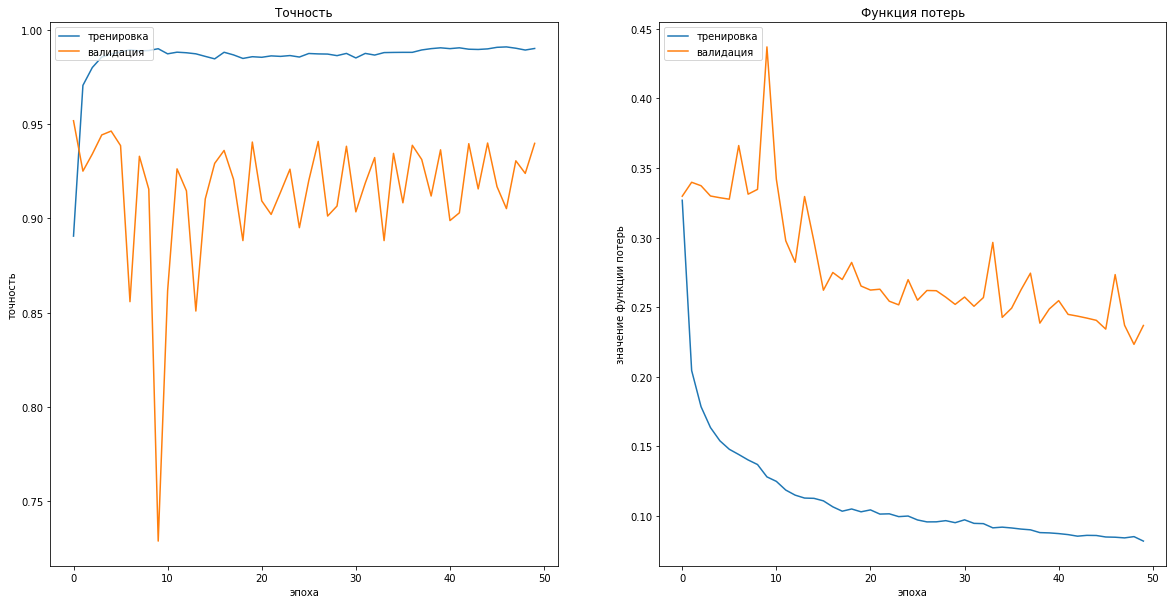

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model8(input_size, output_size):
    print('Create model for input size:', input_size)
     
    model = tf.keras.Sequential()
    #model.add( tf.keras.layers.Reshape( (1, window_size, channels_count),  input_shape=input_size ) )
    
    model.add(tf.keras.Input(shape=input_size))
    model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(1,32), padding='same', name='conv1')) # input_shape=input_size, activation='elu', padding='same'
    model.add(tf.keras.layers.BatchNormalization()) # axis = 1
    model.add(tf.keras.layers.Activation('elu'))
    model.add(tf.keras.layers.AveragePooling2D(pool_size=(1,4)))
    #model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(1,16), padding='same', name='conv2')) # activation='elu',
    ##model.add(tf.keras.layers.DepthwiseConv2D((16, 1), use_bias = False,  depth_multiplier = 2, depthwise_constraint = tf.keras.constraints.MaxNorm(1.)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('elu'))
    model.add(tf.keras.layers.AveragePooling2D(pool_size=(1,2)))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(1,8), padding='same', name='conv3')) # activation='elu', 
    ##model.add(tf.keras.layers.SeparableConv2D(filters=32, kernel_size=(16,8), padding='same', name='conv3')) # activation='elu', 
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('elu'))
    model.add(tf.keras.layers.AveragePooling2D(pool_size=(1,2), name='last_conv')) #GlobalAveragePooling2D())
    #model.add(tf.keras.layers.Dropout(0.5))
    #model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(1,5), activation='elu', padding='same'))
    #model.add(tf.keras.layers.MaxPooling2D(pool_size=(1,2))) # AveragePooling2D
    #model.add(tf.keras.layers.Dropout(0.5))
    ##model.add(tf.keras.layers.Flatten(name='flat'))
    #model.add(tf.keras.layers.Dense(8, activation='elu'))
    #model.add(tf.keras.layers.Dense(4, activation='elu'))
    ##model.add(tf.keras.layers.Dense(output_size, activation='softmax', name='predictions'))
    
    ####model.add(tf.keras.layers.GlobalMaxPooling2D(name='flat'))
    ##model.add(tf.keras.layers.Convolution2D(2, (16,40), activation='softmax', name='flat'))
    ##model.add(tf.keras.layers.Flatten(name='predictions'))

    
    model.add(tf.keras.layers.Convolution2D(2, (1,1), activation='softmax', name='flat'))
    model.add(tf.keras.layers.GlobalAveragePooling2D(name='predictions'))

    print( model.summary() )

    model.compile(loss='categorical_crossentropy',
        optimizer = tf.keras.optimizers.Adam(lr=5e-5), #lr=5e-5 # tf.keras.optimizers.Adam(lr=1e-4), #'adam', #SGD(lr=1e-2, decay=1e-6, momentum=0.9, nesterov=True), #'adam',
        metrics=['accuracy'])
     
    return model

epochs = 50 #150 #50
batch_size = 32 #128

model = get_model8(input_size = X_train.shape[1:], output_size=y_train_cl.shape[1])
#model = tf.keras.models.load_model('model.h5')

history = model.fit(X_train, y_train_cl, epochs=epochs, batch_size=batch_size, verbose=1, #callbacks=callbacks,
        validation_data=(X_test, y_test_cl))
    
plot_history(history)

<class 'numpy.ndarray'>
0.0 [1. 0.]
True
confusion_matrix:
  0    1
[[2732   28]
 [ 323 2752]]

F1: 0.9400512382578993
Confusion matrix, without normalization
[[2732   28]
 [ 323 2752]]


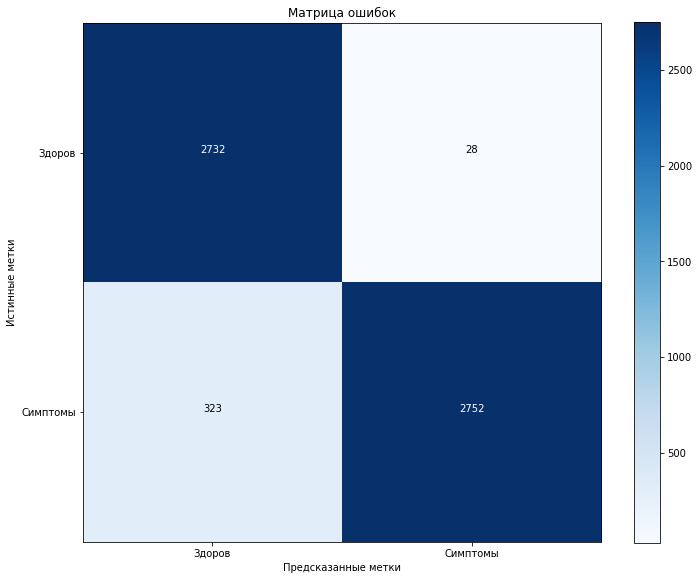

              precision    recall  f1-score   support

        Good       0.89      0.99      0.94      2760
         Bad       0.99      0.89      0.94      3075

    accuracy                           0.94      5835
   macro avg       0.94      0.94      0.94      5835
weighted avg       0.94      0.94      0.94      5835



In [ ]:
model.save('model.h5')

#model = tf.keras.models.load_model('model.h5')

pred = model.predict(X_test, batch_size=32)
print(type(pred))
    
i = 0
print(y_test[i], y_test_cl[i])
    
yy = np.zeros(len(pred))
rpred = np.round(pred)
for i in range(len(pred)):
    if rpred[i][1] == 1.:
        yy[i] = 1
    #print(rpred)
    #print(yy)
#print(yy)    
yy2 = np.argmax(pred, axis=1)
#print(yy2)
print((yy==yy2).all())

cfm = confusion_matrix(y_test, yy)
print('confusion_matrix:\n  0    1')
print(cfm)
f1_sc = f1_score(y_test, yy)
print('\nF1:', f1_sc)
    
# plot confusion matrix
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cfm, classes=['Здоров', 'Симптомы'], #['Good', 'Bad'],
                      title='Матрица ошибок') #title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()
    
report = classification_report(y_test, yy, target_names=['Good', 'Bad'])
print(report)

In [ ]:
test_id = -2000 # -1
print(y_test[test_id], y_test_cl[test_id], pred[test_id])
print(X_test[test_id].shape)

1.0 [0. 1.] [0.01120064 0.98879945]
(19, 1250, 1)


(1, 19, 1250, 1)
Predicted: [[0.01120064 0.98879945]]
input data shape: (1, 19, 1250, 1)
preds tf.Tensor([[0.01120063 0.98879933]], shape=(1, 2), dtype=float32)
top_pred_index: tf.Tensor(1, shape=(), dtype=int64)  top_class_channel: tf.Tensor([0.98879933], shape=(1,), dtype=float32)
len (32,) non zero: 32
Multiply grads
(19, 78)


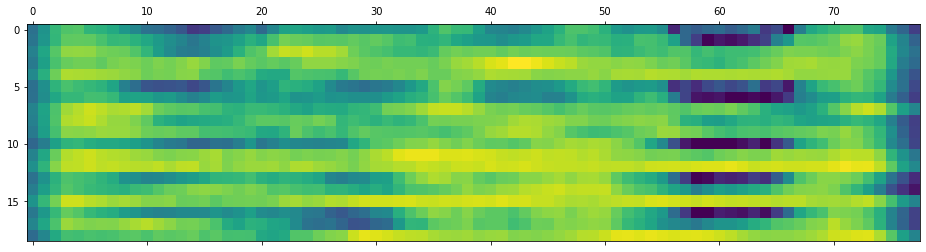

In [ ]:
last_conv_layer_name = "last_conv"
classifier_layer_names = [
    "flat",
    "predictions",
]

def make_gradcam_heatmap(
    img_array, model, last_conv_layer_name, classifier_layer_names
):
    print('input data shape:', img_array.shape)
    # First, we create a model that maps the input image to the activations
    # of the last conv layer
    last_conv_layer = model.get_layer(last_conv_layer_name)
    last_conv_layer_model = keras.Model(model.inputs, last_conv_layer.output)
    #print(last_conv_layer_model.summary())

    # Second, we create a model that maps the activations of the last conv
    # layer to the final class predictions
    classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
    x = classifier_input
    for layer_name in classifier_layer_names:
        x = model.get_layer(layer_name)(x)
    classifier_model = keras.Model(classifier_input, x)

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        # Compute activations of the last conv layer and make the tape watch it
        last_conv_layer_output = last_conv_layer_model(img_array)
        tape.watch(last_conv_layer_output)
        # Compute class predictions
        preds = classifier_model(last_conv_layer_output)
        print('preds', preds)
        #preds = tf.math.add(preds, [1e-6, 1e-6])
        #print('preds', preds)
        top_pred_index = tf.argmax(preds[0])
        top_class_channel = preds[:, top_pred_index]
        print('top_pred_index:', top_pred_index,' top_class_channel:', top_class_channel)

    # This is the gradient of the top predicted class with regard to
    # the output feature map of the last conv layer
    grads = tape.gradient(top_class_channel, last_conv_layer_output)
    #print('grads', grads)
    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    #print('pooled_grads', pooled_grads)
    print('len', pooled_grads.shape, 'non zero:', np.count_nonzero(pooled_grads))
    if np.count_nonzero(pooled_grads) > 0: # check gradients zero
        print('Multiply grads')
        for i in range(pooled_grads.shape[-1]):
            last_conv_layer_output[:, :, i] *= pooled_grads[i]

    # The channel-wise mean of the resulting feature map
    # is our heatmap of class activation
    heatmap = np.mean(last_conv_layer_output, axis=-1)
    #print('heatmap', heatmap)
    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    #print('heatmap', heatmap)
    return heatmap

# add a dimension to transform our array into a "batch" of size (1, 16, 128, 1)
x_t_array = np.expand_dims(X_test[test_id], axis=0)
print(x_t_array.shape)
p = model.predict(x_t_array)
print("Predicted:", p)

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(
    x_t_array, model, last_conv_layer_name, classifier_layer_names
)
print(heatmap.shape)

# Display heatmap
plt.matshow(heatmap)
plt.show()

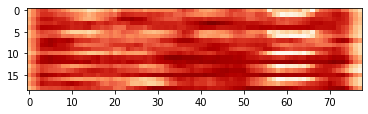

In [ ]:
# convert hotmap to image

import matplotlib.cm as cm

# We rescale heatmap to a range 0-255
heatmap2 = np.uint8(255 * heatmap)

# We use jet colormap to colorize heatmap
jet = cm.get_cmap("OrRd") #("jet") # rainbow

# We use RGB values of the colormap
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap2]

# We create an image with RGB colorized heatmap
jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)

plt.imshow(jet_heatmap)

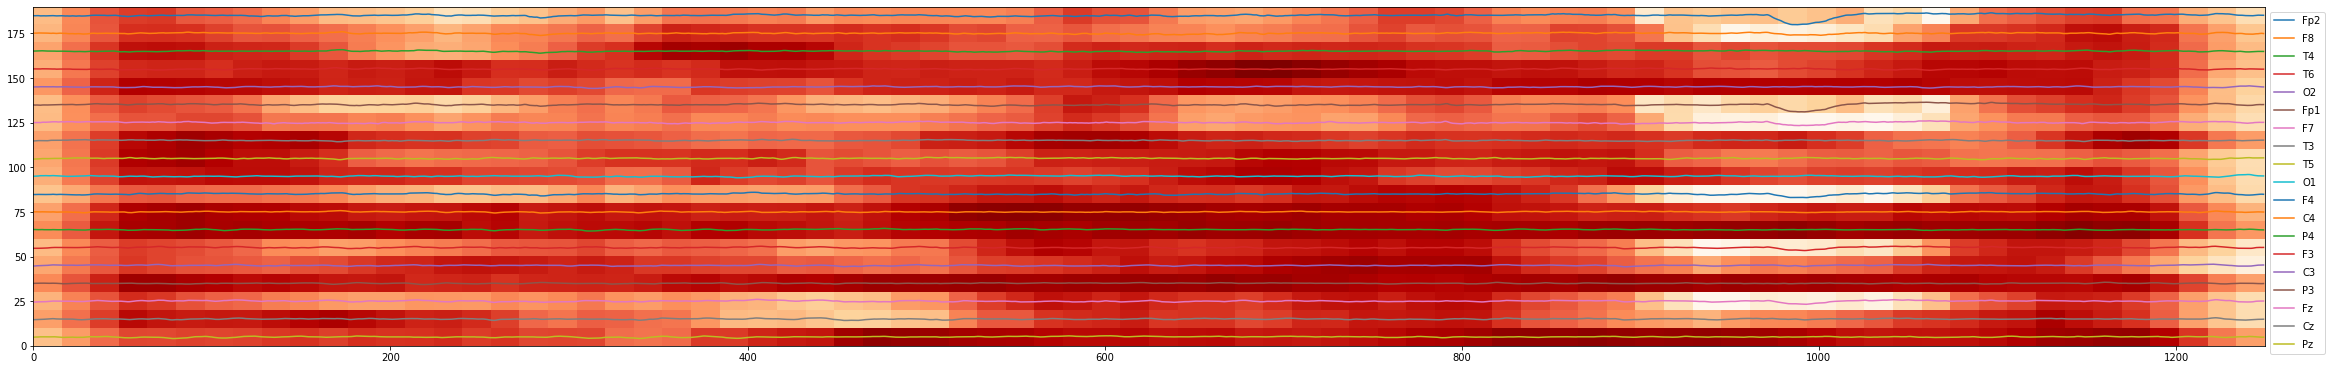

In [ ]:
# plot heatmap and graphs
#plt.figure(figsize=(10, 20))
#plt.matshow(heatmap)
fig, ax = plt.subplots(figsize=(40, 30))

ax.imshow(jet_heatmap, extent=[0, window_size, 0, channels_count*10])
for i in range(channels_count):
    ax.plot(X_test[test_id][i]+185-i*10, label=channels_names[i])
ax.legend(bbox_to_anchor=(1, 1),loc='upper left', labelspacing=0.8) #ncol=len(channels_names), bbox_to_anchor=(0, 1), loc='lower left', fontsize='small' 

./data/s02.edf
0 1250
1250 2500
2500 3750
3750 5000
5000 6250
6250 7500
7500 8750
8750 10000
10000 11250
11250 12500
12500 13750
13750 15000
15000 16250
16250 17500
17500 18750
18750 20000
20000 21250
21250 22500
22500 23750
23750 25000
25000 26250
26250 27500
27500 28750
28750 30000
30000 31250
31250 32500
32500 33750
33750 35000
35000 36250
36250 37500
37500 38750
38750 40000
40000 41250
41250 42500
42500 43750
43750 45000
45000 46250
46250 47500
47500 48750
48750 50000
50000 51250
51250 52500
52500 53750
53750 55000
55000 56250
56250 57500
57500 58750
58750 60000
60000 61250
61250 62500
62500 63750
63750 65000
65000 66250
66250 67500
67500 68750
68750 70000
70000 71250
71250 72500
72500 73750
73750 75000
75000 76250
76250 77500
77500 78750
78750 80000
80000 81250
81250 82500
82500 83750
83750 85000
85000 86250
86250 87500
87500 88750
88750 90000
90000 91250
91250 92500
92500 93750
93750 95000
95000 96250
96250 97500
97500 98750
98750 100000
100000 101250
101250 102500
102500 103750


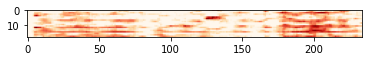

In [ ]:
def get_eeg_data2(df, eeg_channel_names, window_size, window_step):
    eeg_data = []

    for i in range(0, df.shape[0], window_step):
        start = i
        end = start + window_size
        print(start, end)
        data = np.array(df[eeg_channel_names][start:end], dtype=np.float32)
        eeg_data.append(data)
    
    return np.asarray(eeg_data)

def get_eegdata_from_edf_file(filename, data_window_size):
    df = read_eeg_data_from_edf_file(filename, print_info=False)
    data = get_eeg_data2(df, eeg_channel_names, data_window_size, data_window_size)
    return data

def heatmap_to_img(heatmap):
    # We rescale heatmap to a range 0-255
    heatmap2 = np.uint8(255 * heatmap)

    # We use jet colormap to colorize heatmap
    jet = cm.get_cmap("OrRd") #("jet") # rainbow

    # We use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap2]

    # We create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)

    return jet_heatmap

# eeg_data_files_norm
# eeg_data_files_sch

#filename = eeg_data_files_norm[-2]
filename = eeg_data_files_sch[-3]
print(filename)
data_sch0 = get_eegdata_from_edf_file(filename, window_size)[:3] ##!!
print(data_sch0.shape)
print(data_sch0.shape[0]*data_sch0.shape[1])

data_sch0 = standartization(data_sch0)
data_sch0 = convert_to_CS1(data_sch0)

p = model.predict(data_sch0)
print("Predicted:", p, p.shape)
print("Mean prediction:", np.mean(p, axis=0))

heatmap_images_list = []
for d in data_sch0:
    #print(d.shape)
    # add a dimension to transform our array into a "batch" of size (1, 16, 128, 1)
    d = np.expand_dims(d, axis=0)
    print(d.shape)
    p = model.predict(d)
    print("Predicted:", p)

    # Generate class activation heatmap
    heatmap = make_gradcam_heatmap(
        d, model, last_conv_layer_name, classifier_layer_names
    )

    # Display heatmap
    #plt.matshow(heatmap)
    #plt.show()

    jet_heatmap = heatmap_to_img(heatmap)
    #plt.imshow(jet_heatmap)
    #plt.show()

    heatmap_images_list.append(jet_heatmap)

res_img = np.concatenate(heatmap_images_list, axis=1)
print(res_img.shape)
plt.imshow(res_img)

0 3750
3750 7500
7500 11250
11250 15000
15000 18750
18750 22500
22500 26250
26250 30000
30000 33750
33750 37500
37500 41250
41250 45000
45000 48750
48750 52500
52500 56250
56250 60000
60000 63750
63750 67500
67500 71250
71250 75000
75000 78750
78750 82500
82500 86250
86250 90000
90000 93750
93750 97500
97500 101250
101250 105000
105000 108750
108750 112500
112500 116250
116250 120000
120000 123750
123750 127500
127500 131250
131250 135000
135000 138750
138750 142500
142500 146250
146250 150000
150000 153750
153750 157500
157500 161250
161250 165000
165000 168750
168750 172500
172500 176250
176250 180000
180000 183750
183750 187500
187500 191250
191250 195000
195000 198750
198750 202500
202500 206250
206250 210000
210000 213750
213750 217500
217500 221250
221250 225000
225000 228750
228750 232500
232500 236250
236250 240000
240000 243750
243750 247500
247500 251250
251250 255000
255000 258750
258750 262500
262500 266250
266250 270000
270000 273750
273750 277500
277500 281250
281250 2850

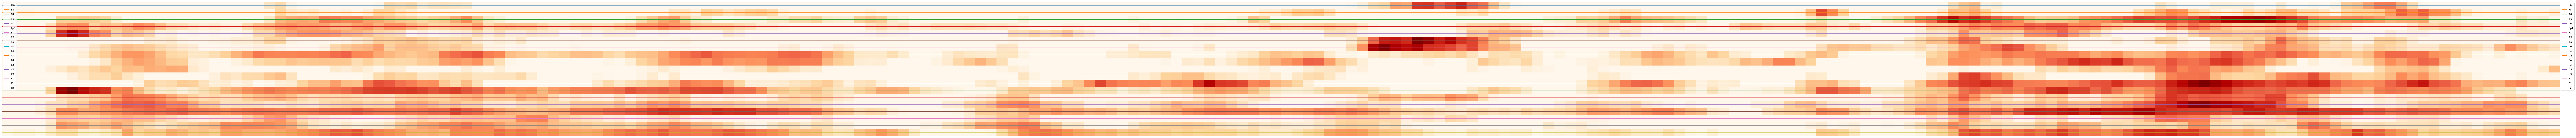

In [ ]:
samples_count = int(window_size*3)
all_data = get_eegdata_from_edf_file(filename, samples_count)[0]
print(all_data.shape)

#all_data_flt = lowpass_filter( highpass_filter( notch_filter(all_data, fs), fs ), fs, 60)

my_dpi = 100
fig, ax = plt.subplots(figsize=(20000/my_dpi, 1000/my_dpi), dpi=my_dpi) #(256, 32)
#ax.axes.get_xaxis().set_visible(False)
#ax.axes.get_yaxis().set_visible(False)
fig.patch.set_visible(False)
ax.axis('off')
ax.margins(0,0)

x = np.linspace(0, samples_count*fs, samples_count)
ax.imshow(res_img, extent=[0, samples_count*fs, 0, channels_count*2600])
for i in range(channels_count):
    ax.plot(x, all_data[:,i]+18.5*2600-i*2600, label=channels_names[i])
#ax.legend(bbox_to_anchor=(1, 1), loc='upper left', labelspacing=2.65)

legend1 = plt.legend(channels_names, loc='upper left', bbox_to_anchor=(0, 1), labelspacing=0.85)
legend2 = plt.legend(channels_names, loc='upper left', bbox_to_anchor=(1, 1), labelspacing=0.85) # 2.8
ax.add_artist(legend1)
ax.add_artist(legend2)
plt.savefig('res.png', bbox_inches = 'tight', pad_inches = 0)
plt.show()